<a href="https://colab.research.google.com/github/finr/data-analysis-class/blob/master/Leitura_de_Arquivos_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leitura de Arquivos

## Quais os jogadores de tênis com o maior número de vitórias em 2018?
## Quais os jogadores de tênis com o maior número de vitórias em 2018 em cada tipo de piso?

Vamos usar o dataset sobre partidas de tênis disponível em https://github.com/JeffSackmann/tennis_atp .

Primeiramente vamos fazer o download do arquivo `csv` para a máquina local. Em seguida vamos ler os dados do arquivo.

In [33]:
!wget https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv

--2019-10-06 22:21:08--  https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 601936 (588K) [text/plain]
Saving to: ‘atp_matches_2018.csv.1’

atp_matches_2018.cs 100%[===================>] 587.83K  --.-KB/s    in 0.05s   

2019-10-06 22:21:08 (11.3 MB/s) - ‘atp_matches_2018.csv.1’ saved [601936/601936]



In [34]:
!ls -la


total 1192
drwxr-xr-x 1 root root   4096 Oct  6 22:21 .
drwxr-xr-x 1 root root   4096 Oct  6 20:28 ..
-rw-r--r-- 1 root root 601936 Oct  6 20:31 atp_matches_2018.csv
-rw-r--r-- 1 root root 601936 Oct  6 22:21 atp_matches_2018.csv.1
drwxr-xr-x 1 root root   4096 Sep 27 15:12 .config
drwxr-xr-x 1 root root   4096 Aug 27 16:17 sample_data


In [0]:
import pandas as pd 

with open('atp_matches_2018.csv', 'r') as f:
    jogos_df = pd.read_csv(f)


In [36]:
jogos_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-M020,Brisbane,Hard,NaN,A,20180101,271,105992,NaN,NaN,Ryan Harrison,R,183.0,USA,25.65,104919,NaN,NaN,Leonardo Mayer,R,188.0,ARG,30.63,6-4 3-6 6-2,3,R32,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
1,2018-M020,Brisbane,Hard,NaN,A,20180101,272,111577,NaN,NaN,Jared Donaldson,R,NaN,USA,21.23,111442,NaN,WC,Jordan Thompson,R,NaN,AUS,23.70,6-2 6-4,3,R32,90.0,5.0,3.0,58.0,32.0,25.0,14.0,9.0,4.0,5.0,3.0,5.0,62.0,41.0,25.0,7.0,9.0,7.0,11.0,54.0,890.0,94.0,593.0
2,2018-M020,Brisbane,Hard,NaN,A,20180101,273,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,31.32,106000,7.0,NaN,Damir Dzumhur,R,172.0,BIH,25.62,6-7(4) 6-3 6-2,3,R32,145.0,7.0,0.0,94.0,66.0,48.0,12.0,14.0,9.0,11.0,8.0,6.0,120.0,53.0,37.0,29.0,15.0,10.0,16.0,63.0,809.0,30.0,1391.0
3,2018-M020,Brisbane,Hard,NaN,A,20180101,275,200282,NaN,WC,Alex De Minaur,R,NaN,AUS,18.87,105449,NaN,NaN,Steve Johnson,R,188.0,USA,28.02,7-6(7) 6-4,3,R32,104.0,9.0,3.0,66.0,37.0,32.0,17.0,11.0,2.0,3.0,6.0,2.0,80.0,43.0,33.0,17.0,11.0,4.0,6.0,208.0,245.0,44.0,1055.0
4,2018-M020,Brisbane,Hard,NaN,A,20180101,276,111581,NaN,Q,Michael Mmoh,R,NaN,USA,19.98,105643,NaN,NaN,Federico Delbonis,L,190.0,ARG,27.24,6-3 6-4,3,R32,69.0,5.0,4.0,55.0,38.0,32.0,11.0,10.0,3.0,3.0,4.0,0.0,45.0,35.0,28.0,5.0,9.0,0.0,2.0,175.0,299.0,68.0,755.0


Podemos agrupar os vencedores e contar a quantidade de ocorrências para identificar o jogador com o maior número de vitórias...

In [0]:
df_winner_group = jogos_df.groupby('winner_name')

In [38]:
df_winner_group['winner_id'].count().sort_values(ascending=False)

winner_name
Alexander Zverev                      58
Dominic Thiem                         54
Novak Djokovic                        53
Roger Federer                         49
Kevin Anderson                        48
Juan Martin Del Potro                 48
Fabio Fognini                         47
Stefanos Tsitsipas                    46
Marin Cilic                           45
Rafael Nadal                          45
Karen Khachanov                       44
Kei Nishikori                         43
Daniil Medvedev                       42
Borna Coric                           40
Kyle Edmund                           37
Denis Shapovalov                      35
Richard Gasquet                       35
John Isner                            34
Milos Raonic                          33
Gilles Simon                          33
Roberto Bautista Agut                 33
Fernando Verdasco                     33
Diego Sebastian Schwartzman           33
Pablo Carreno Busta                   31
Gael

Visualizando...

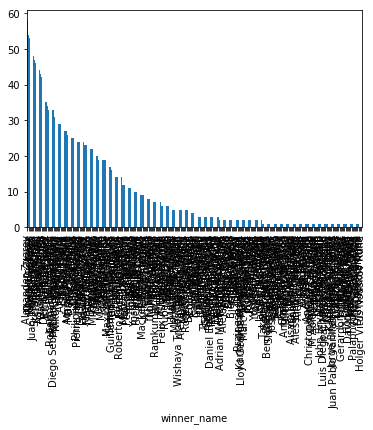

In [39]:
import matplotlib.pyplot as plt

df_winner_group['winner_id'].count().sort_values(ascending=False).plot(kind='bar')
plt.show()

Muita informação... podemos filtrar pelos 15 primeiros

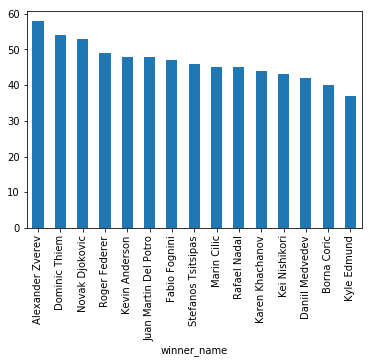

In [40]:
df_winner_group['winner_id'].count().sort_values(ascending=False)[:15].plot(kind='bar')
plt.show()

#### Agrupando vencedores por tipo de piso

In [0]:
df_winner_hard = jogos_df[jogos_df['surface']=='Hard'].groupby('winner_name')
df_winner_clay = jogos_df[jogos_df['surface']=='Clay'].groupby('winner_name')
df_winner_grass = jogos_df[jogos_df['surface']=='Grass'].groupby('winner_name')

In [61]:
df_winner_clay['winner_id'].count().sort_values(ascending=False)[:5]

winner_name
Dominic Thiem       30
Rafael Nadal        26
Fabio Fognini       21
Alexander Zverev    21
Nicolas Jarry       20
Name: winner_id, dtype: int64

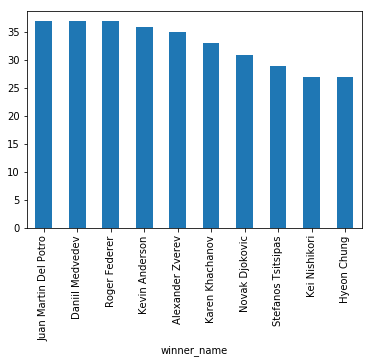

In [68]:
#Cimento
df_winner_hard['winner_id'].count().sort_values(ascending=False)[:10].plot.bar()
plt.show()

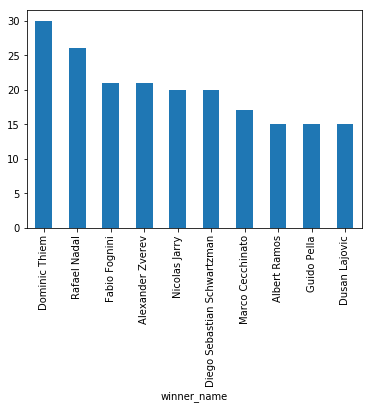

In [70]:
#Saibro
df_winner_clay['winner_id'].count().sort_values(ascending=False)[:10].plot.bar()
plt.show()

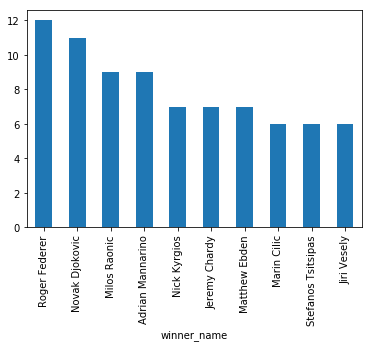

In [71]:
#Grama
df_winner_grass['winner_id'].count().sort_values(ascending=False)[:10].plot.bar()
plt.show()